# Project Title: House Rental Price Analysis

### Problem Statement:
- The purpose of this project is to explore and analyze a house rental dataset to identify the major factors that affect rental prices. Using data analysis techniques, we aim to clean, visualize, and interpret data to gain a deeper understanding of how parameters like city, house price, BHK count, and furnishing type impact the rent value. The findings will help in building a foundation for predictive modeling and data-driven housing insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re


# Web Scraping

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,/;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
}

In [ ]:
# Price, bhk, location, bathroom, furnishing, tenant Prefeneces
Location = ["Hyderabad","Mumbai","Kolkata"]
Price = []
BHK = []
House_type = []
Area_locality = []
City = []
Bathroom = []
Furnishing = []
Tenant_Prefeneces = []
Size = []
for i in range(1,13):
    print("Page: ",i)
    for j in Location:
        urls  = "https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=&proptype=Residential-House,Villa&cityName="+j+"&page="+str(i)
        pages = requests.get(urls,headers=headers)
        soup  = BeautifulSoup(pages.text)
    
        p = soup.find_all("div",class_= "mb-srp__card__price--amount")
        for i in p:
            Price.append(i.text)
            
            
        b = soup.find_all("h2",class_="mb-srp__card--title")
        for i in b:
            a = re.findall(r"(\d+)\sBHK",i.text)
            BHK.append(a[0])
            
        title = soup.find_all("h2",class_="mb-srp__card--title")
        
        for i in title:
            House_type.append(i.text.split()[2])
            
        for i in title:
            a = re.findall(r"in\s+([A-Za-z0-9\s,]+?)\s+(?:Hyderabad|Mumbai|Kolkata)",i.text)

            if len(a) > 0:
                Area_locality.append(a[0].strip())
            else:
                Area_locality.append(np.nan)
    
        for i in title:
            City.append(i.text.split()[-1])
    
        Facilties = soup.find_all("div",class_="mb-srp__card__summary__list")
        
        for i in Facilties:
            a = re.findall(r"Furnishing(\s*Semi-Furnished|Furnished|Unfurnished)",i.text)
            Furnishing.append(a[0])
    
        for i in Facilties:
            a = re.findall(r"Bathroom(\d)Tenant",i.text)
            if len(a) > 0:
                Bathroom.append(a[0])
            else:
                Bathroom.append(np.nan)
    
        for i in Facilties:
            a = re.findall(r"Preferred(\s*Bachelors/Family|Family|Bachelors)",i.text)
            Tenant_Prefeneces.append(a[0])
    
        for i in Facilties:
            a = re.findall(r"Area(\d+)\s",i.text)
            if len(a) > 0:
                Size.append(a[0])
            else:
                Size.append(np.nan)
            
    print(f'No of Houses :{len(Price)}')
            
        

Page:  1


In [ ]:
dic = {"BHK":BHK,
       "House Type":House_type,
       "Area Locality":Area_locality,
       "City":City,"Bathroom":Bathroom,
       "Furnishing":Furnishing,
       "Tenant Prefeneces":Tenant_Prefeneces,
       "Size":Size,
       "Price":Price}

In [ ]:
data1 = pd.DataFrame(dic)
data1

In [ ]:
data1.to_csv("house_rental.csv")

In [3]:
data = pd.read_csv("house_rental.csv")
data

,Unnamed: 0,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,0,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Semi-Furnished,Bachelors/Family,5030.0,₹2.3 Lac
1,1,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Furnished,Bachelors/Family,3900.0,₹3 Lac
2,2,4,Villa,Chanda Nagar,Hyderabad,5.0,Unfurnished,Bachelors/Family,3200.0,"₹70,000"
3,3,3,Villa,"Tellapur, Outer Ring Road",Hyderabad,3.0,Semi-Furnished,Bachelors/Family,1850.0,"₹55,000"
4,4,4,Villa,"Pragathi Nagar, Kukatpally",Hyderabad,4.0,Furnished,Bachelors/Family,2400.0,"₹36,000"
...,...,...,...,...,...,...,...,...,...,...
1075,1075,2,House,Sector 2 Salt Lake City,Kolkata,2.0,Semi-Furnished,Bachelors/Family,1000.0,"₹25,000"
1076,1076,6,Villa,Action Area 2,Kolkata,5.0,Furnished,Bachelors,6000.0,₹3 Lac
1077,1077,5,House,"Stand Alone, New Town",Kolkata,3.0,Unfurnished,Bachelors/Family,1650.0,"₹70,000"
1078,1078,10,BHK,New Town,Kolkata,NaN,Furnished,Bachelors/Family,6000.0,₹2.2 Lac


# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1080 non-null   int64  
 1   BHK                1080 non-null   int64  
 2   House Type         1080 non-null   object 
 3   Area Locality      1078 non-null   object 
 4   City               1080 non-null   object 
 5   Bathroom           1055 non-null   float64
 6   Furnishing         1080 non-null   object 
 7   Tenant Prefeneces  1080 non-null   object 
 8   Size               1079 non-null   float64
 9   Price              1080 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 84.5+ KB


In [5]:
## Type conversation

In [6]:
data.drop(columns= "Unnamed: 0",axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                1080 non-null   int64  
 1   House Type         1080 non-null   object 
 2   Area Locality      1078 non-null   object 
 3   City               1080 non-null   object 
 4   Bathroom           1055 non-null   float64
 5   Furnishing         1080 non-null   object 
 6   Tenant Prefeneces  1080 non-null   object 
 7   Size               1079 non-null   float64
 8   Price              1080 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 76.1+ KB


In [8]:
data["House Type"].unique()

array(['Villa', 'House', 'BHK'], dtype=object)

In [9]:
#  type convertion of the variable which is object to category
data["House Type"]= data["House Type"].astype("category")

In [10]:
data["City"] = data["City"].astype("category")

In [11]:
data["Bathroom"].unique()

array([ 5.,  3.,  4.,  2.,  7.,  1.,  6., nan])

In [12]:
data["Bathroom"]= data["Bathroom"].astype("category")

In [13]:
data["Furnishing"].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [14]:
data["Furnishing"] = data["Furnishing"].astype("category")

In [15]:
data["Tenant Prefeneces"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [16]:
data["Tenant Prefeneces"] = data["Tenant Prefeneces"].astype("category")

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BHK                1080 non-null   int64   
 1   House Type         1080 non-null   category
 2   Area Locality      1078 non-null   object  
 3   City               1080 non-null   category
 4   Bathroom           1055 non-null   category
 5   Furnishing         1080 non-null   category
 6   Tenant Prefeneces  1080 non-null   category
 7   Size               1079 non-null   float64 
 8   Price              1080 non-null   object  
dtypes: category(5), float64(1), int64(1), object(2)
memory usage: 40.0+ KB


In [18]:
## price variable data type is string which have the "2.5 lac " so iw nat to convert them into values float

In [19]:
def convert_price(price):
    if pd.isna(price):
        return None
    price =price.replace("₹","").replace(",","").strip().lower()

    if "lac" in price:
        value = float(price.replace("lac","").strip())
        return value*100000
    else:
        try:
            return float(price)
        except ValueError:
            return None

In [20]:
data["Price"] = data["Price"].apply(convert_price)

In [21]:
data.head()

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Semi-Furnished,Bachelors/Family,5030.0,230000.0
1,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Furnished,Bachelors/Family,3900.0,300000.0
2,4,Villa,Chanda Nagar,Hyderabad,5.0,Unfurnished,Bachelors/Family,3200.0,70000.0
3,3,Villa,"Tellapur, Outer Ring Road",Hyderabad,3.0,Semi-Furnished,Bachelors/Family,1850.0,55000.0
4,4,Villa,"Pragathi Nagar, Kukatpally",Hyderabad,4.0,Furnished,Bachelors/Family,2400.0,36000.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BHK                1080 non-null   int64   
 1   House Type         1080 non-null   category
 2   Area Locality      1078 non-null   object  
 3   City               1080 non-null   category
 4   Bathroom           1055 non-null   category
 5   Furnishing         1080 non-null   category
 6   Tenant Prefeneces  1080 non-null   category
 7   Size               1079 non-null   float64 
 8   Price              1079 non-null   float64 
dtypes: category(5), float64(2), int64(1), object(1)
memory usage: 40.0+ KB


In [23]:
data.isna().sum()

BHK                   0
House Type            0
Area Locality         2
City                  0
Bathroom             25
Furnishing            0
Tenant Prefeneces     0
Size                  1
Price                 1
dtype: int64

In [24]:
data

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Semi-Furnished,Bachelors/Family,5030.0,230000.0
1,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Furnished,Bachelors/Family,3900.0,300000.0
2,4,Villa,Chanda Nagar,Hyderabad,5.0,Unfurnished,Bachelors/Family,3200.0,70000.0
3,3,Villa,"Tellapur, Outer Ring Road",Hyderabad,3.0,Semi-Furnished,Bachelors/Family,1850.0,55000.0
4,4,Villa,"Pragathi Nagar, Kukatpally",Hyderabad,4.0,Furnished,Bachelors/Family,2400.0,36000.0
...,...,...,...,...,...,...,...,...,...
1075,2,House,Sector 2 Salt Lake City,Kolkata,2.0,Semi-Furnished,Bachelors/Family,1000.0,25000.0
1076,6,Villa,Action Area 2,Kolkata,5.0,Furnished,Bachelors,6000.0,300000.0
1077,5,House,"Stand Alone, New Town",Kolkata,3.0,Unfurnished,Bachelors/Family,1650.0,70000.0
1078,10,BHK,New Town,Kolkata,NaN,Furnished,Bachelors/Family,6000.0,220000.0


In [25]:
## Checking the missing values in data 

In [26]:
## detecting the Missing values in the data

In [27]:
data.isna() # True is Nan False is Not Nan

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1075,False,False,False,False,False,False,False,False,False
1076,False,False,False,False,False,False,False,False,False
1077,False,False,False,False,False,False,False,False,False
1078,False,False,False,False,True,False,False,False,False


In [28]:
data.isna().sum()

BHK                   0
House Type            0
Area Locality         2
City                  0
Bathroom             25
Furnishing            0
Tenant Prefeneces     0
Size                  1
Price                 1
dtype: int64

In [29]:
data.describe(include="all")

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
count,1080.000000,1080,1078,1080,1055.0,1080,1080,1079.000000,1.079000e+03
unique,NaN,3,279,3,7.0,3,3,NaN,NaN
top,NaN,House,"New Garia, Garia",Hyderabad,2.0,Semi-Furnished,Bachelors/Family,NaN,NaN
freq,NaN,668,24,360,345.0,486,661,NaN,NaN
mean,3.202778,NaN,NaN,NaN,NaN,NaN,NaN,2029.505097,1.272849e+05
std,1.705519,NaN,NaN,NaN,NaN,NaN,NaN,1792.192318,2.435492e+05
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,4.000000e+03
25%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,850.000000,1.500000e+04
50%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,5.000000e+04
75%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3000.000000,1.300000e+05


In [30]:
data.isna().sum()

BHK                   0
House Type            0
Area Locality         2
City                  0
Bathroom             25
Furnishing            0
Tenant Prefeneces     0
Size                  1
Price                 1
dtype: int64

In [31]:
data.head()

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Semi-Furnished,Bachelors/Family,5030.0,230000.0
1,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Furnished,Bachelors/Family,3900.0,300000.0
2,4,Villa,Chanda Nagar,Hyderabad,5.0,Unfurnished,Bachelors/Family,3200.0,70000.0
3,3,Villa,"Tellapur, Outer Ring Road",Hyderabad,3.0,Semi-Furnished,Bachelors/Family,1850.0,55000.0
4,4,Villa,"Pragathi Nagar, Kukatpally",Hyderabad,4.0,Furnished,Bachelors/Family,2400.0,36000.0


In [32]:
data.dropna(subset=["Area Locality"],inplace = True)

In [33]:
data.isna().sum()

BHK                   0
House Type            0
Area Locality         0
City                  0
Bathroom             25
Furnishing            0
Tenant Prefeneces     0
Size                  1
Price                 1
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BHK                1078 non-null   int64   
 1   House Type         1078 non-null   category
 2   Area Locality      1078 non-null   object  
 3   City               1078 non-null   category
 4   Bathroom           1053 non-null   category
 5   Furnishing         1078 non-null   category
 6   Tenant Prefeneces  1078 non-null   category
 7   Size               1077 non-null   float64 
 8   Price              1077 non-null   float64 
dtypes: category(5), float64(2), int64(1), object(1)
memory usage: 48.2+ KB


In [35]:
## filling the missing values in data 

In [36]:
data.fillna({"Bathroom":data["Bathroom"].mode()[0],
             "Size": data["Size"].mean(),
             "Price": data["Price"].mean()}, inplace= True)

In [37]:
data.isna().sum()

BHK                  0
House Type           0
Area Locality        0
City                 0
Bathroom             0
Furnishing           0
Tenant Prefeneces    0
Size                 0
Price                0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BHK                1078 non-null   int64   
 1   House Type         1078 non-null   category
 2   Area Locality      1078 non-null   object  
 3   City               1078 non-null   category
 4   Bathroom           1078 non-null   category
 5   Furnishing         1078 non-null   category
 6   Tenant Prefeneces  1078 non-null   category
 7   Size               1078 non-null   float64 
 8   Price              1078 non-null   float64 
dtypes: category(5), float64(2), int64(1), object(1)
memory usage: 48.2+ KB


In [39]:
data.reset_index(drop= True,inplace= True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BHK                1078 non-null   int64   
 1   House Type         1078 non-null   category
 2   Area Locality      1078 non-null   object  
 3   City               1078 non-null   category
 4   Bathroom           1078 non-null   category
 5   Furnishing         1078 non-null   category
 6   Tenant Prefeneces  1078 non-null   category
 7   Size               1078 non-null   float64 
 8   Price              1078 non-null   float64 
dtypes: category(5), float64(2), int64(1), object(1)
memory usage: 39.9+ KB


In [41]:
data.head()

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Semi-Furnished,Bachelors/Family,5030.0,230000.0
1,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Furnished,Bachelors/Family,3900.0,300000.0
2,4,Villa,Chanda Nagar,Hyderabad,5.0,Unfurnished,Bachelors/Family,3200.0,70000.0
3,3,Villa,"Tellapur, Outer Ring Road",Hyderabad,3.0,Semi-Furnished,Bachelors/Family,1850.0,55000.0
4,4,Villa,"Pragathi Nagar, Kukatpally",Hyderabad,4.0,Furnished,Bachelors/Family,2400.0,36000.0


In [42]:
data.duplicated().sum()

np.int64(661)

In [43]:
#data = data.drop_duplicates()

In [44]:
data

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Semi-Furnished,Bachelors/Family,5030.0,230000.0
1,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Furnished,Bachelors/Family,3900.0,300000.0
2,4,Villa,Chanda Nagar,Hyderabad,5.0,Unfurnished,Bachelors/Family,3200.0,70000.0
3,3,Villa,"Tellapur, Outer Ring Road",Hyderabad,3.0,Semi-Furnished,Bachelors/Family,1850.0,55000.0
4,4,Villa,"Pragathi Nagar, Kukatpally",Hyderabad,4.0,Furnished,Bachelors/Family,2400.0,36000.0
...,...,...,...,...,...,...,...,...,...
1073,2,House,Sector 2 Salt Lake City,Kolkata,2.0,Semi-Furnished,Bachelors/Family,1000.0,25000.0
1074,6,Villa,Action Area 2,Kolkata,5.0,Furnished,Bachelors,6000.0,300000.0
1075,5,House,"Stand Alone, New Town",Kolkata,3.0,Unfurnished,Bachelors/Family,1650.0,70000.0
1076,10,BHK,New Town,Kolkata,2.0,Furnished,Bachelors/Family,6000.0,220000.0


# Data Analysis:

## Univariate Analysis : 
- analyzing the single variable it is to understand the Central Tendencey Distribution of mean , median , mode, Std,var, max, min like describe() 

Price and Area Size Central Tendencey and Measure of Dispersion
|       |        Price |     Size |
|:------|-------------:|---------:|
| count |   1078       |  1078    |
| mean  | 127501       |  2031.28 |
| std   | 243610       |  1792.53 |
| min   |   4000       |    80    |
| 25%   |  15000       |   850    |
| 50%   |  55000       |  1500    |
| 75%   | 130000       |  3000    |
| max   |      1.8e+06 | 15000    |



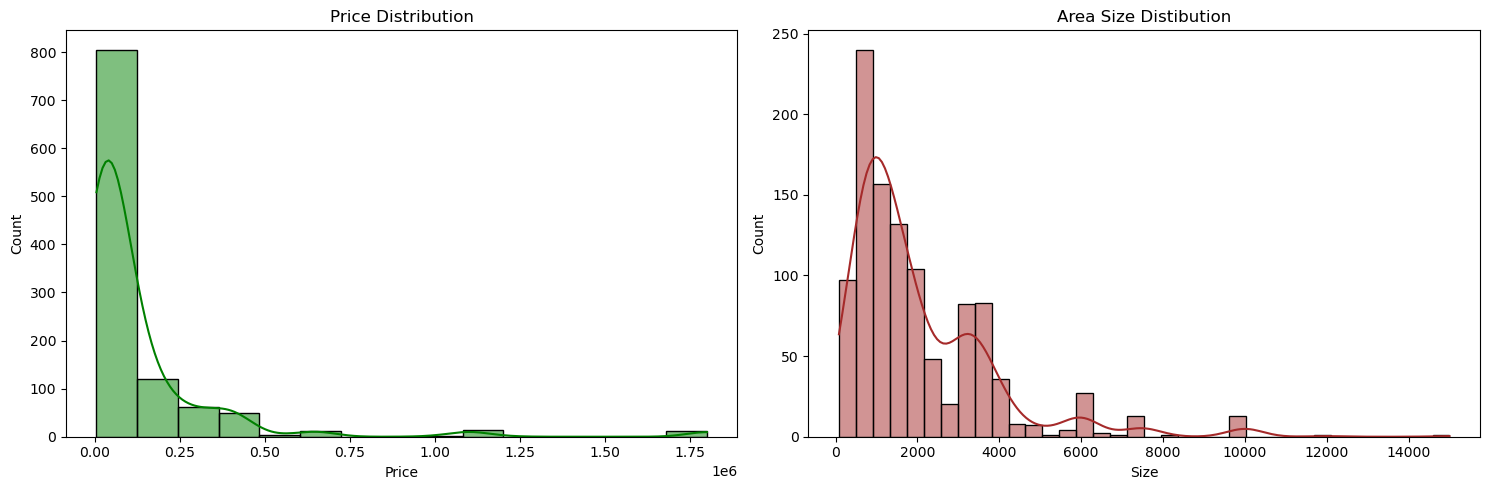

In [45]:
# analysis on Central Tendency  and Measure of dispersion
print("Price and Area Size Central Tendencey and Measure of Dispersion")
con_numeric_variable = data[["Price","Size"]].describe()
print(con_numeric_variable.to_markdown())
print()

# Distribution of Price and Area Size of House

fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.histplot(data = data, x = "Price",kde= True, bins = 15,ax = ax[0] ,color = "green")
sns.histplot(data = data, x = "Size", kde = True, ax = ax[1], color = "brown")
ax[0].set_title("Price Distribution")
ax[1].set_title("Area Size Distibution")
plt.tight_layout()
plt.show()


---- Frequency Distribution Over BHK ----
|   BHK |   Count |   Percentage |
|------:|--------:|-------------:|
|     1 |     108 |    10.0186   |
|     2 |     322 |    29.8701   |
|     3 |     239 |    22.1707   |
|     4 |     273 |    25.3247   |
|     5 |      40 |     3.71058  |
|     6 |      55 |     5.10204  |
|     7 |      14 |     1.2987   |
|     8 |       2 |     0.185529 |
|    10 |      25 |     2.31911  |
Total House:  1078
BHK Min : 1 , Max : 10
---- Ferquency Distribution Over House Type ----
| House Type   |   Count |   Percentage |
|:-------------|--------:|-------------:|
| House        |     666 |     61.7811  |
| Villa        |     387 |     35.8998  |
| BHK          |      25 |      2.31911 |


---- Frequency Distribution Over Area Locality ----
|        | Area Locality    |
|:-------|:-----------------|
| count  | 1078             |
| unique | 279              |
| top    | New Garia, Garia |
| freq   | 24               |


-- Top 10 Area location in Hyderabad

C:\Users\hp\AppData\Local\Temp\ipykernel_11140\4103148119.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="BHK", ax=ax[0,0], palette="Set2", order=sorted(data["BHK"].unique()))
C:\Users\hp\AppData\Local\Temp\ipykernel_11140\4103148119.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="House Type", ax=ax[0,1], palette="Set2")
C:\Users\hp\AppData\Local\Temp\ipykernel_11140\4103148119.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="City", ax=ax[1,0], palette="pastel")
C:\Users\hp\AppDat

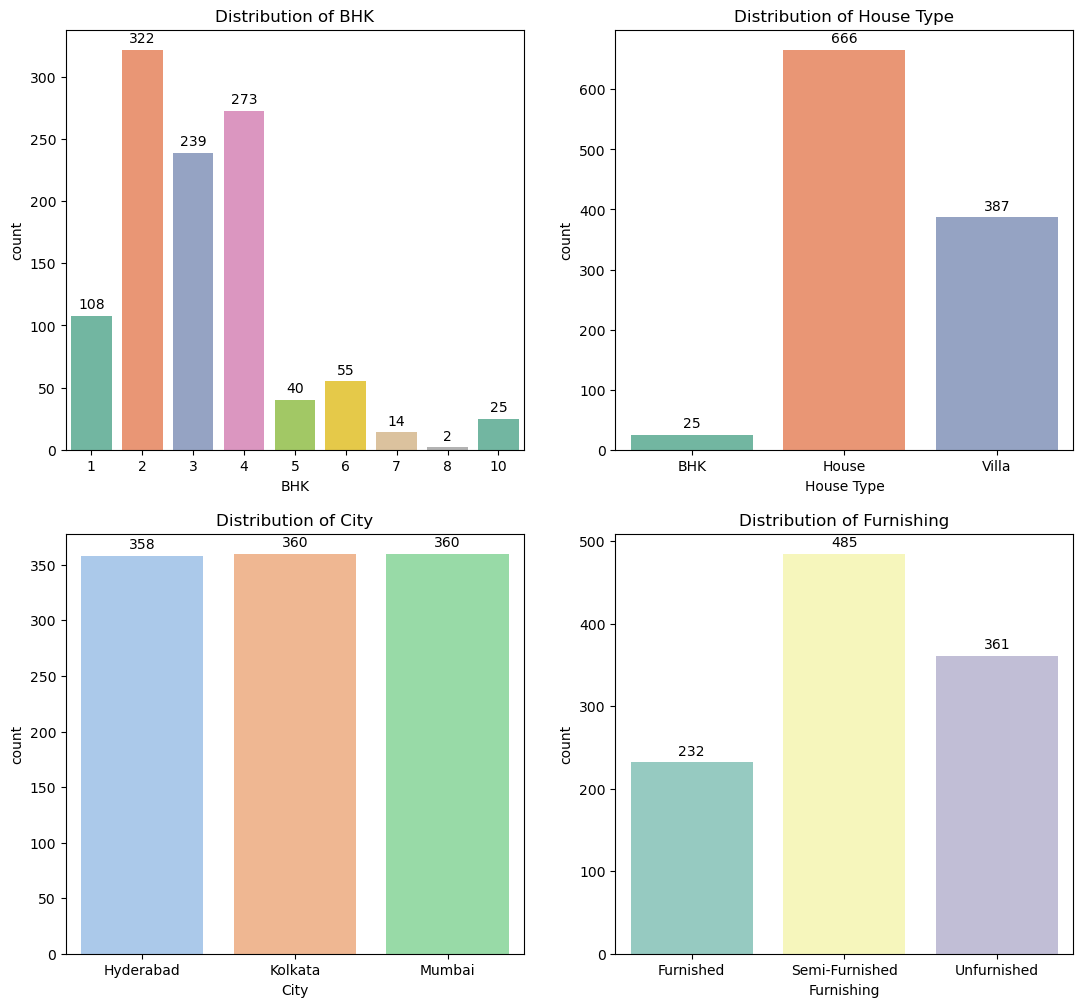

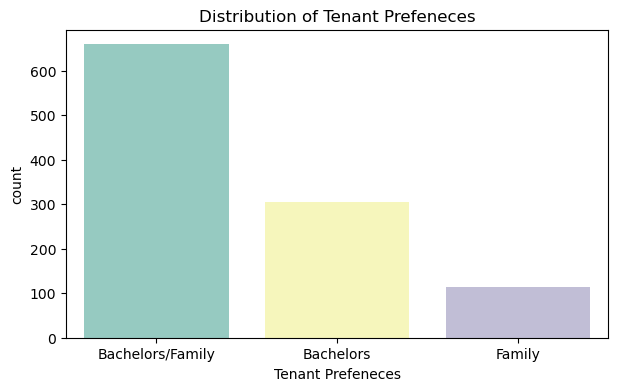

In [48]:
print("---- Frequency Distribution Over BHK ----")
BHK_count = data["BHK"].value_counts().rename("Count")
BHK_percentile = data["BHK"].value_counts(normalize = True).mul(100).rename("Percentage")
BHK = pd.concat((BHK_count,BHK_percentile), axis = 1)
BHK = BHK.sort_index()
print(BHK.to_markdown())

print("Total House: ", data["BHK"].value_counts().sum() )
print(f"BHK Min : {data["BHK"].min()} , Max : {data["BHK"].max()}")

print("---- Ferquency Distribution Over House Type ----")
house_type_count = data["House Type"].value_counts().rename("Count")
house_type_percentage = data["House Type"].value_counts(normalize = True).mul(100).rename("Percentage")
house_type = pd.concat((house_type_count,house_type_percentage), axis = 1)
print(house_type.to_markdown())
print("\n")

print("---- Frequency Distribution Over Area Locality ----")
area_loc = data["Area Locality"].describe(include = "all")
print(area_loc.to_markdown())
print("\n")
print("-- Top 10 Area location in Hyderabad --")
Top_10_hyderabad_area_loc = data[data["City"]== "Hyderabad"]["Area Locality"].value_counts().head(10)
print(Top_10_hyderabad_area_loc.to_markdown())
print("Total Area Loaction in Hyderbad : ",data[data["City"]=="Hyderabad"]["Area Locality"].value_counts().sum())
print("\n")
print("-- Top 10 Area location in Mumbai --")
Top_10_Mumbai_area_loc = data.loc[data["City"]== "Mumbai","Area Locality"].value_counts().head(10)
print(Top_10_Mumbai_area_loc.to_markdown())
print("Total Area Loaction in Mumbai : ",data.loc[data["City"]=="Mumbai","Area Locality"].value_counts().sum())
print("\n")
print("-- Top 10 Area location in Kolkata --")
Top_10_Mumbai_area_loc = data.loc[data["City"]== "Kolkata","Area Locality"].value_counts().head(10)
print(Top_10_Mumbai_area_loc.to_markdown())
print("Total Area Loaction in Kolkata : ",data[data["City"]=="Kolkata"]["Area Locality"].value_counts().sum())

print("\n")
print("---- Frequency Distribution Over City")
city_count = data["City"].value_counts().rename("Count")
city_percentage = data["City"].value_counts(normalize =True).mul(100).rename("Percenatge")
city_over = pd.concat((city_count,city_percentage), axis = 1)
print(city_over.to_markdown())

print("\n")
print("---- Frequency Distribution Over Furnishing ----")
Furnishing_count = data["Furnishing"].value_counts().rename("Count")
Furnishing_percentage = data["Furnishing"].value_counts(normalize = True).mul(100).rename("Percentage")
Furnishing_over = pd.concat((Furnishing_count,Furnishing_percentage), axis = 1)
print(Furnishing_over.to_markdown())

print("\n")
print("---- Frequency Distribution Over Tenant Prefeneces ----")
Tenat_count = data["Tenant Prefeneces"].value_counts().rename("Count")
Tenant_percentage = data["Tenant Prefeneces"].value_counts(normalize = True).mul(100).rename("Percentage")
Tenant_over = pd.concat((Tenat_count,Tenant_percentage), axis = 1)
print(Tenant_over.to_markdown())

fig, ax = plt.subplots(2,2,figsize =(13,12) )
# BHK Countplot
sns.countplot(data=data, x="BHK", ax=ax[0,0], palette="Set2", order=sorted(data["BHK"].unique()))
ax[0,0].set_title("Distribution of BHK")
for container in ax[0,0].containers:
    ax[0,0].bar_label(container, fmt='%d', padding=3)


# House Type Countplot
sns.countplot(data=data, x="House Type", ax=ax[0,1], palette="Set2")
ax[0,1].set_title("Distribution of House Type")
for container in ax[0,1].containers:
    ax[0,1].bar_label(container, fmt='%d', padding=3)


# City Countplot
sns.countplot(data=data, x="City", ax=ax[1,0], palette="pastel")
ax[1,0].set_title("Distribution of City")
for container in ax[1,0].containers:
    ax[1,0].bar_label(container, fmt='%d', padding=3)


# Furnishing Countplot
sns.countplot(data=data, x="Furnishing", ax=ax[1,1], palette="Set3")
ax[1,1].set_title("Distribution of Furnishing")
for container in ax[1,1].containers:
    ax[1,1].bar_label(container, fmt='%d', padding=3)
# Tenant Prefeneces Countplot
fig, ax = plt.subplots( figsize=(7,4))
sns.countplot(data=data, x="Tenant Prefeneces", ax=ax, palette="Set3", order=data["Tenant Prefeneces"].value_counts().index)
ax.set_title("Distribution of Tenant Prefeneces")
plt.show()



In [49]:
data

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Semi-Furnished,Bachelors/Family,5030.0,230000.0
1,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Furnished,Bachelors/Family,3900.0,300000.0
2,4,Villa,Chanda Nagar,Hyderabad,5.0,Unfurnished,Bachelors/Family,3200.0,70000.0
3,3,Villa,"Tellapur, Outer Ring Road",Hyderabad,3.0,Semi-Furnished,Bachelors/Family,1850.0,55000.0
4,4,Villa,"Pragathi Nagar, Kukatpally",Hyderabad,4.0,Furnished,Bachelors/Family,2400.0,36000.0
...,...,...,...,...,...,...,...,...,...
1073,2,House,Sector 2 Salt Lake City,Kolkata,2.0,Semi-Furnished,Bachelors/Family,1000.0,25000.0
1074,6,Villa,Action Area 2,Kolkata,5.0,Furnished,Bachelors,6000.0,300000.0
1075,5,House,"Stand Alone, New Town",Kolkata,3.0,Unfurnished,Bachelors/Family,1650.0,70000.0
1076,10,BHK,New Town,Kolkata,2.0,Furnished,Bachelors/Family,6000.0,220000.0


In [50]:
data.head()

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Semi-Furnished,Bachelors/Family,5030.0,230000.0
1,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Furnished,Bachelors/Family,3900.0,300000.0
2,4,Villa,Chanda Nagar,Hyderabad,5.0,Unfurnished,Bachelors/Family,3200.0,70000.0
3,3,Villa,"Tellapur, Outer Ring Road",Hyderabad,3.0,Semi-Furnished,Bachelors/Family,1850.0,55000.0
4,4,Villa,"Pragathi Nagar, Kukatpally",Hyderabad,4.0,Furnished,Bachelors/Family,2400.0,36000.0


## Bivariate Analysis
- Bivarite analysis is association between the two variables or we can tell that the relationship between the two variables 
- association b/w the Numerical and Numerical variable Analysis
- association b/w the Categorical and Numerical  variable Analysis
- association b/w the Categorical and Categorical variable Analysis

---- Bivariate Analysis and Multivariate Analysis ----

---- Association Between Numerical and Categorical ----


---- Analysis Of City And Price ----
| City      |   Price_Mean |   Min_Price |    Max_Price |   Count |
|:----------|-------------:|------------:|-------------:|--------:|
| Mumbai    |     264932   |       25000 |      1.8e+06 |     360 |
| Hyderabad |      74595   |        5000 |      1.2e+06 |     358 |
| Kolkata   |      42683.3 |        4000 | 300000       |     360 |

---- Analysis Of Furnishing and Price ----
| Furnishing     |   Price_Mean |   Min_Price |   Max_Price |   Count |
|:---------------|-------------:|------------:|------------:|--------:|
| Furnished      |       135402 |        5500 |     1e+06   |     232 |
| Semi-Furnished |       104706 |        4000 |     1.1e+06 |     485 |
| Unfurnished    |       153048 |        5000 |     1.8e+06 |     361 |

---- Analysis Of Tenant Prefeneces and Price ----
| Tenant Prefeneces   |   Price_Mean |   Min_Price |  

Text(0.5, 1.0, 'Distribution of Rent Prices by BHK')

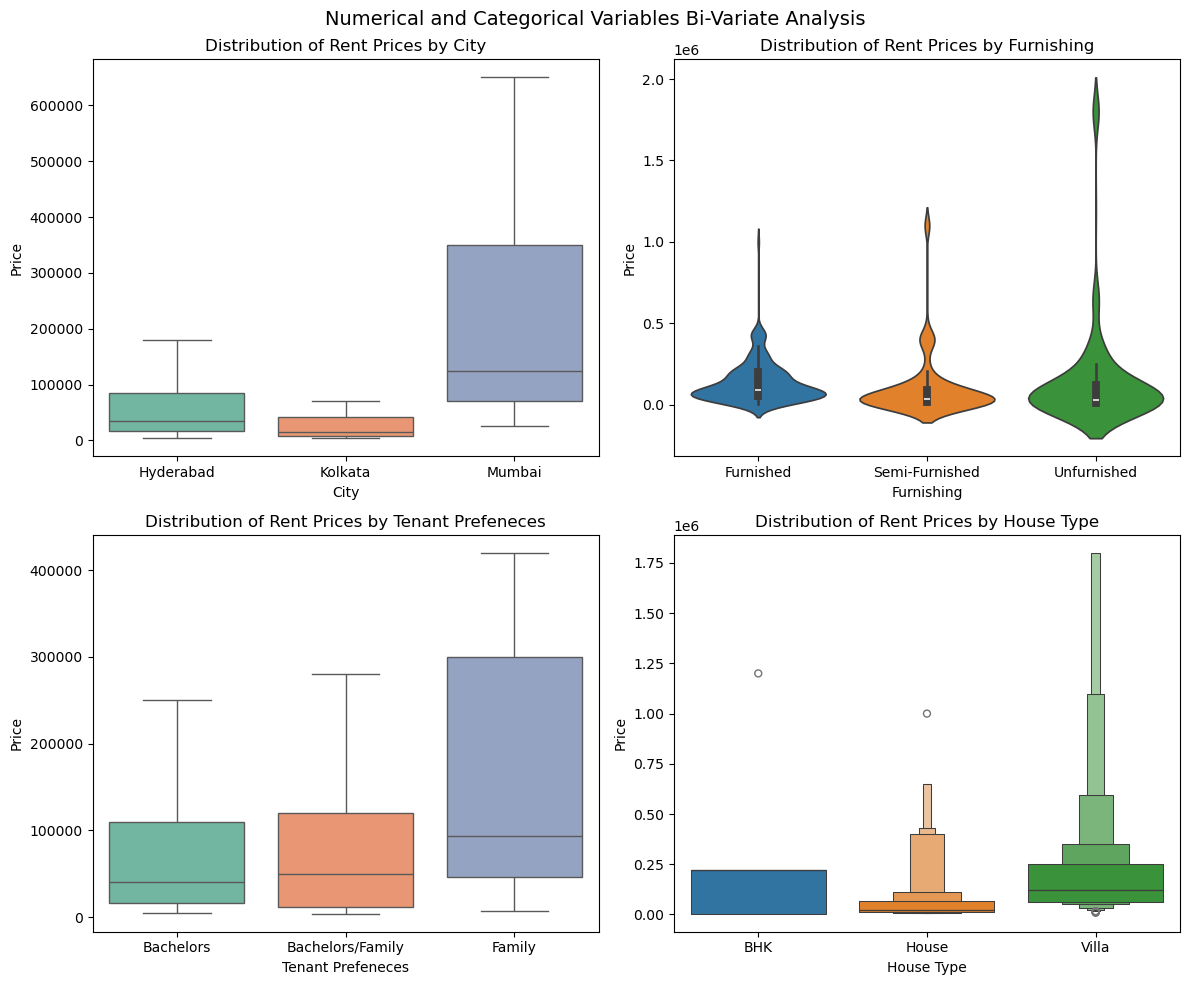

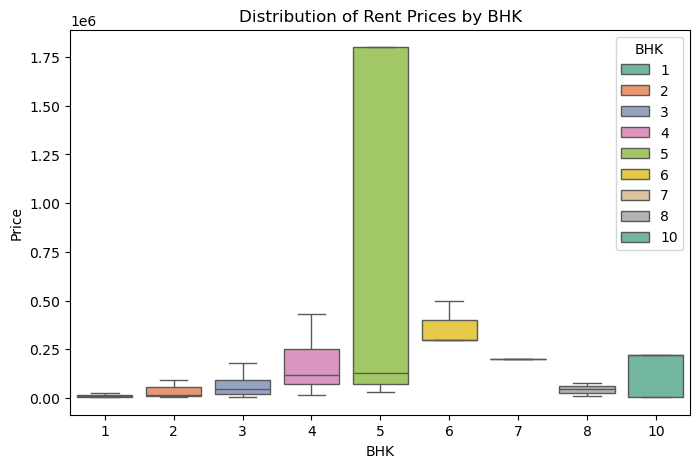

In [51]:
print("---- Bivariate Analysis and Multivariate Analysis ----")
 
# Which city has the highest average rent price?
print("\n---- Association Between Numerical and Categorical ----")
print("\n")

City_Price = data.groupby("City",observed = True).agg(Price_Mean= ("Price","mean"),Min_Price=("Price","min"),Max_Price = ("Price","max"),Count=("Price", "count"))
print("---- Analysis Of City And Price ----")
City_Price = City_Price.sort_values(by = "Price_Mean",ascending = False)
print(City_Price.to_markdown())

print("\n---- Analysis Of Furnishing and Price ----")
Furnishing_Price = data.groupby("Furnishing",observed = True).agg(Price_Mean= ("Price","mean"),Min_Price=("Price","min"),Max_Price = ("Price","max"),Count=("Price", "count"))
print(Furnishing_Price.to_markdown())

print("\n---- Analysis Of Tenant Prefeneces and Price ----")
Tenant_price = data.groupby("Tenant Prefeneces",observed = True).agg(Price_Mean = ("Price","mean"),Min_Price = ("Price","min"),Max_Price = ("Price","max"),Count= ("Price","count"))
print(Tenant_price.to_markdown())

print("\n---- Analysis Of BHK and Price ----")
BHK_Price = data.pivot_table(index="BHK",values="Price",aggfunc= ["mean","min","max","count"])
BHK_Price.columns = ["Price_Mean", "Price_Min", "Price_Max", "Count"]
print(BHK_Price.to_markdown())

print("\n---- Analysis Of House Type and Price ----")
House_Price= data.groupby("House Type",observed= True).agg(Price_Mean = ("Price","mean"),Min_Price = ("Price","min"),Max_Price = ("Price","max"),Count=("Price","count"))
print(House_Price.to_markdown())


## Bi-variate Plotting

fig, ax = plt.subplots(2,2,figsize =(12,10))
plt.suptitle("Numerical and Categorical Variables Bi-Variate Analysis",fontsize = 14 )
sns.boxplot(data=data, y="Price", x="City", hue="City", showfliers=False, palette="Set2", ax=ax[0,0])
ax[0,0].set_title("Distribution of Rent Prices by City")

sns.violinplot(data = data , y = "Price",x="Furnishing", hue = "Furnishing", ax = ax[0,1])
ax[0,1].set_title("Distribution of Rent Prices by Furnishing")

sns.boxplot(data=data, y="Price", x = "Tenant Prefeneces", hue="Tenant Prefeneces", showfliers=False, palette="Set2", ax=ax[1,0])
ax[1,0].set_title("Distribution of Rent Prices by Tenant Prefeneces")

sns.boxenplot(data = data , y = "Price",x="House Type", hue = "House Type", ax = ax[1,1])
ax[1,1].set_title("Distribution of Rent Prices by House Type")
plt.tight_layout()
fig, ax = plt.subplots(figsize =(8,5))
sns.boxplot(data=data, y="Price", x = "BHK", hue="BHK", showfliers=False, palette="Set2",ax = ax)
ax.set_title("Distribution of Rent Prices by BHK")


In [53]:
data.head()

,BHK,House Type,Area Locality,City,Bathroom,Furnishing,Tenant Prefeneces,Size,Price
0,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Semi-Furnished,Bachelors/Family,5030.0,230000.0
1,4,Villa,"Kokapet, Outer Ring Road",Hyderabad,5.0,Furnished,Bachelors/Family,3900.0,300000.0
2,4,Villa,Chanda Nagar,Hyderabad,5.0,Unfurnished,Bachelors/Family,3200.0,70000.0
3,3,Villa,"Tellapur, Outer Ring Road",Hyderabad,3.0,Semi-Furnished,Bachelors/Family,1850.0,55000.0
4,4,Villa,"Pragathi Nagar, Kukatpally",Hyderabad,4.0,Furnished,Bachelors/Family,2400.0,36000.0



---- Association Between Numerical and Numerical / Categorical and Categorical----


---- Correlation of Size and Price ----
|       |     Size |    Price |
|:------|---------:|---------:|
| Size  | 1        | 0.721055 |
| Price | 0.721055 | 1        |

 ---- Analysis of Furnishing and City ----
| Furnishing     |   Hyderabad |   Kolkata |   Mumbai |
|:---------------|------------:|----------:|---------:|
| Furnished      |          64 |        48 |      120 |
| Semi-Furnished |         209 |       168 |      108 |
| Unfurnished    |          85 |       144 |      132 |

 ---- Analysis of BHK and City ----
|   BHK |   Hyderabad |   Kolkata |   Mumbai |
|------:|------------:|----------:|---------:|
|     1 |          36 |        48 |       24 |
|     2 |          82 |       144 |       96 |
|     3 |          95 |        84 |       60 |
|     4 |         117 |        24 |      132 |
|     5 |          16 |        12 |       12 |
|     6 |           7 |        12 |       36 |
|     7 |

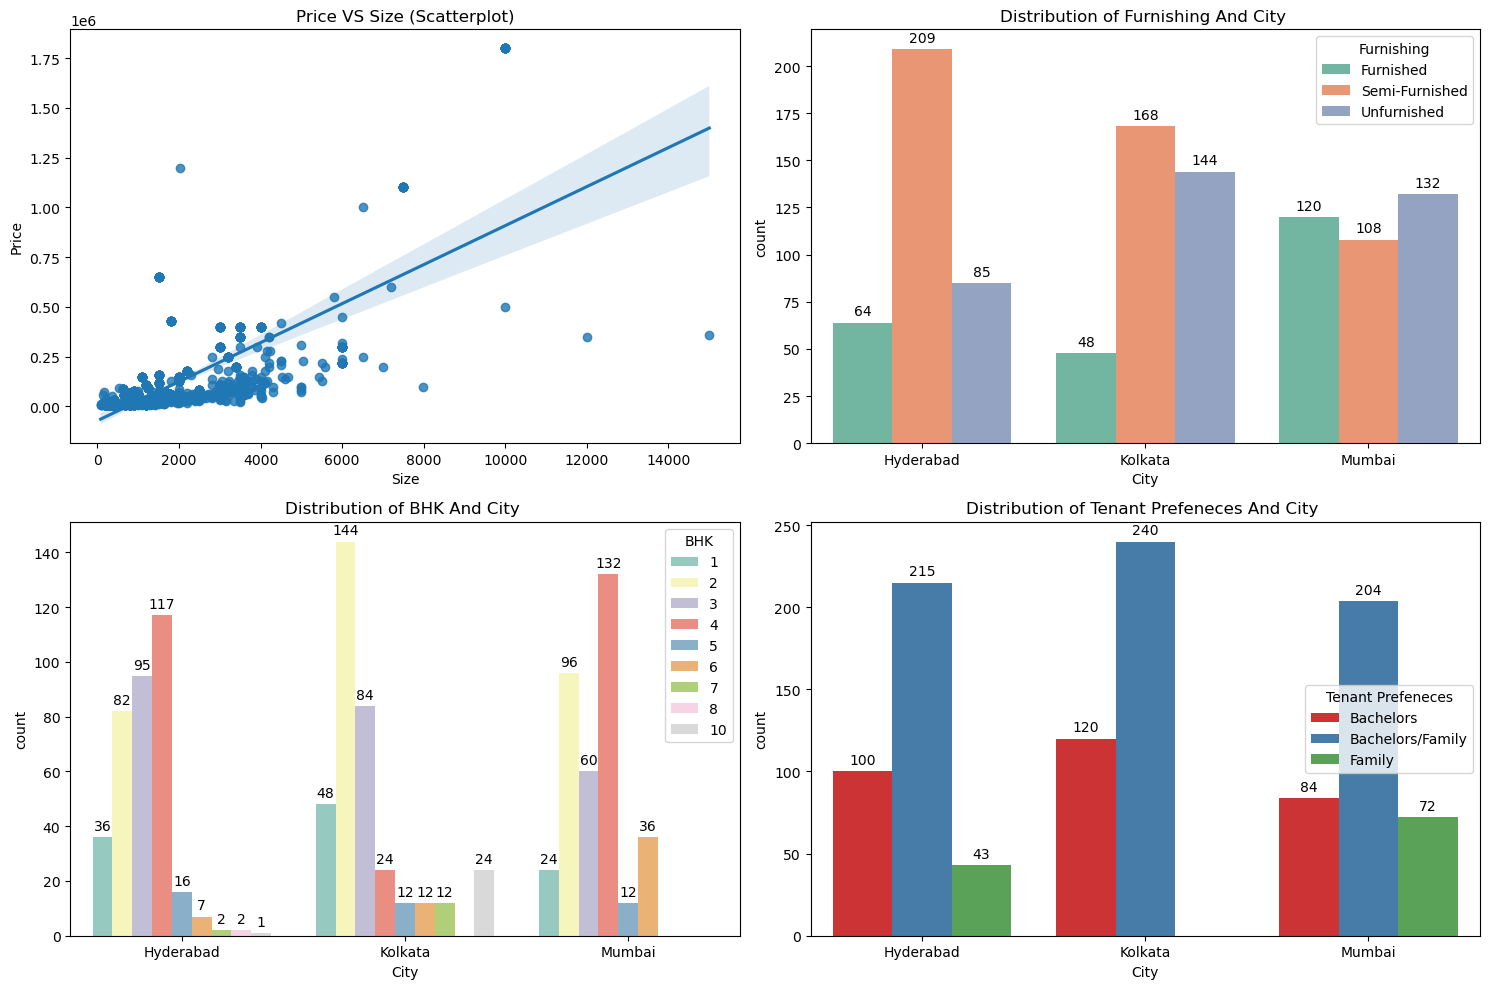

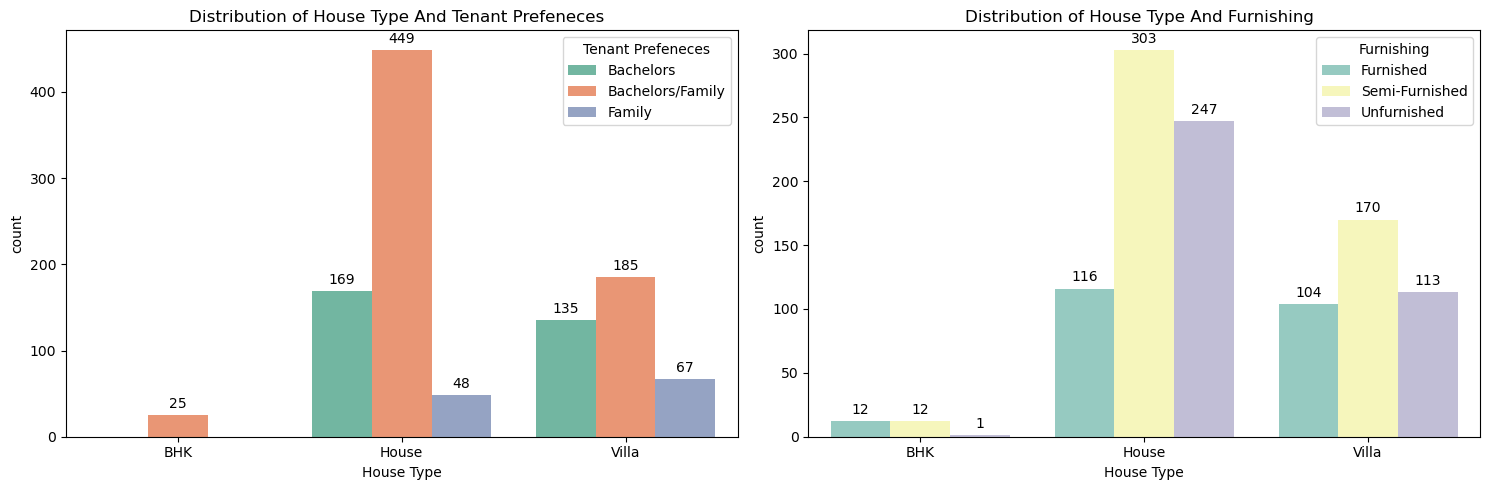

In [95]:
print("\n---- Association Between Numerical and Numerical / Categorical and Categorical----")
print("\n")

print("---- Correlation of Size and Price ----")
Correlation_data = data[["Size","Price"]].corr()
print(Correlation_data.to_markdown())

print("\n ---- Analysis of Furnishing and City ----")
Furnishing_crosstab = pd.crosstab(index = data["Furnishing"],columns=data["City"])
print(Furnishing_crosstab.to_markdown())

print("\n ---- Analysis of BHK and City ----")
BHK_crosstab = pd.crosstab(index = data["BHK"],columns=data["City"])
print(BHK_crosstab.to_markdown())

print("\n ---- Analysis of Tenant Prefeneces and City ----")
Tenant_crosstab = pd.crosstab(index = data["Tenant Prefeneces"],columns=data["City"])
print(Tenant_crosstab.to_markdown())

print("\n ---- Analysis of House Type and Tenant Prefeneces  ----")
House_crosstab = pd.crosstab(index = data["House Type"],columns=data["Tenant Prefeneces"])
print(House_crosstab.to_markdown())

print("\n ---- Analysis of House Type and Furnishing  ----")
Fur_House_crosstab = pd.crosstab(index = data["Furnishing"] ,columns=data["House Type"])
print(Fur_House_crosstab.to_markdown())


fig, ax = plt.subplots(2,2,figsize = (15,10))
sns.regplot(data = data, x = "Size", y = "Price", ax= ax[0,0])
ax[0,0].set_title("Price VS Size (Scatterplot)")
plt.tight_layout()

## Distribution of Furnishing And City 
sns.countplot(data=data, x="City",hue ="Furnishing", ax=ax[0,1], palette="Set2")
ax[0,1].set_title("Distribution of Furnishing And City ")
for container in ax[0,1].containers:
    ax[0,1].bar_label(container, fmt='%d', padding=3)
plt.tight_layout()

sns.countplot(data=data, x="City",hue ="BHK", ax=ax[1,0], palette="Set3")
ax[1,0].set_title("Distribution of BHK And City ")
for container in ax[1,0].containers:
    ax[1,0].bar_label(container, fmt='%d', padding=3)
plt.tight_layout()

sns.countplot(data=data, x="City",hue ="Tenant Prefeneces", ax=ax[1,1], palette="Set1")
ax[1,1].set_title("Distribution of Tenant Prefeneces And City ")
for container in ax[1,1].containers:
    ax[1,1].bar_label(container, fmt='%d', padding=3)
plt.tight_layout()

fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.countplot(data=data, x="House Type",hue ="Tenant Prefeneces", ax=ax[0], palette="Set2")
ax[0].set_title("Distribution of House Type And Tenant Prefeneces  ")
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', padding=3)
plt.tight_layout()

sns.countplot(data=data, x="House Type",hue ="Furnishing", ax=ax[1], palette="Set3")
ax[1].set_title("Distribution of House Type And Furnishing  ")
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%d', padding=3)
plt.tight_layout()